In [1]:
# Stdlib
import pickle
from IPython.display import display, Latex

# Scientific computing
import numpy as np

# Data handling and vis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Miscellaneous
from tabulate import tabulate

# Preprocessing

## Loading and concatenating dataframes

In [2]:
# Small datasets
metadata = {
    "PROJECT_ID": "EMB_ex27",
    "RESEARCHERS": "DK",
    "CURRENT_VERSION": "v2.1",
    "DATE": "20230227"
}
TAG = "{PROJECT_ID}{CURRENT_VERSION}_{RESEARCHERS}_{DATE}".format(**metadata)

df = pd.read_csv(f"../../results/dataframes/dataframe_{TAG}.csv")

In [3]:
# MEC reference - D
# Mistake with label, don't worry about DC in load statement
with open("../../results/MEC/D-arxiv.pkl", "rb") as _fh:
    arxiv_D = pickle.load(_fh)[('DC', 2, 6)]
with open("../../results/MEC/D-drosophila.pkl", "rb") as _fh:
    drosophila_D = pickle.load(_fh)[('DC', 1, 2)]
with open("../../results/MEC/D-celegans.pkl", "rb") as _fh:
    celegans_D = pickle.load(_fh)[('DC', 1, 2)]
with open("../../results/MEC/D-london.pkl", "rb") as _fh:
    london_D = pickle.load(_fh)[('DC', 1, 2)]

In [4]:
# MEC reference - DC
with open("../../results/MEC/figure4a_data.pk", "rb") as _fh:
    arxiv_DC = pickle.load(_fh)[('DC', 2, 6)]
with open("../../results/MEC/figure4b_data.pk", "rb") as _fh:
    drosophila_DC = pickle.load(_fh)[('DC', 1, 2)]
with open("../../results/MEC/figure4c_data.pk", "rb") as _fh:
    celegans_DC = pickle.load(_fh)[('DC', 1, 2)]
with open("../../results/MEC/figure4d_data.pk", "rb") as _fh:
    london_DC = pickle.load(_fh)[('DC', 1, 2)]

## Pruning

In [5]:
# Drop dummy index
df = df.drop(columns=["Unnamed: 0"])

# Drop rows with infs
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(how="any", inplace=True)

## Reindexing and renaming

In [6]:
# Rename layers
df = df.rename(columns={"l1": "alpha", "l2": "beta"})

In [7]:
df.describe()

,alpha,beta,theta,accuracy,auroc,aupr,process_time,wall_time
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,1.250000,3.000000,0.450000,0.776461,0.761564,0.809695,0.094523,0.094525
std,0.433284,1.733134,0.287408,0.104595,0.261587,0.296910,0.118382,0.118384
min,1.000000,2.000000,0.000000,0.598485,0.230891,0.160405,0.002543,0.002544
25%,1.000000,2.000000,0.200000,0.702270,0.500000,0.810542,0.004735,0.004736
50%,1.000000,2.000000,0.450000,0.729018,0.926456,0.982816,0.035488,0.035489
75%,1.250000,3.000000,0.700000,0.917777,0.970311,0.993309,0.152848,0.152850
max,2.000000,6.000000,0.900000,0.938419,1.000000,1.000000,0.473234,0.473236


# Analysis

<Figure size 640x480 with 0 Axes>

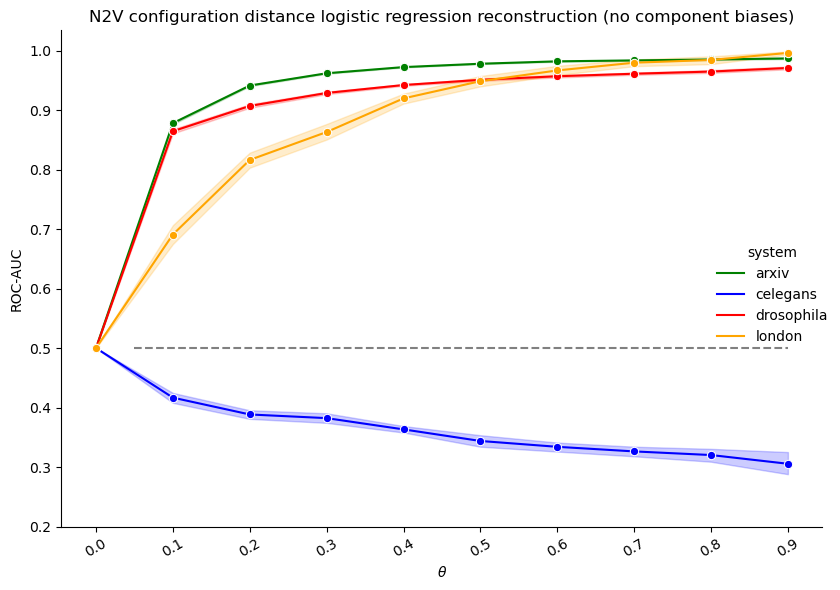

In [8]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df, kind="line",
    x="theta", y="auroc",
    hue="system", palette=["green", "blue", "red", "orange"],
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.9, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.2, 1, endpoint=True, num=8+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.title("N2V configuration distance logistic regression reconstruction (no component biases)")

# Save plot
plt.tight_layout()
plt.savefig("../../results/plots/line_auroc-pfi_N2V-logreg-configuration-distance.png", facecolor="white", transparent=False)

Text(0.5, 1.0, 'Reproduce Naive Bayes D results')

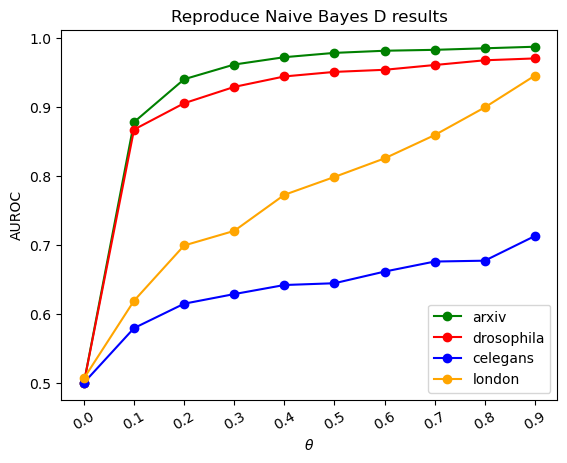

In [15]:
plt.figure()

plt.plot(arxiv_D[2], label="arxiv", color="green", marker="o")
plt.plot(drosophila_D[2], label="drosophila", color="red", marker="o")
plt.plot(celegans_D[2], label="celegans", color="blue", marker="o")
plt.plot(london_D[2], label="london", color="orange", marker="o")

plt.legend()

plt.xticks(
    range(10),
    [
        float(np.format_float_scientific(x, precision=1))
        for x in np.linspace(0, 0.9, 10)
    ],
    rotation=30
)

plt.xlabel("$\\theta$")
plt.ylabel("AUROC")

plt.title("Reproduce Naive Bayes D results")

Text(0.5, 1.0, 'Reproduce Naive Bayes DC results')

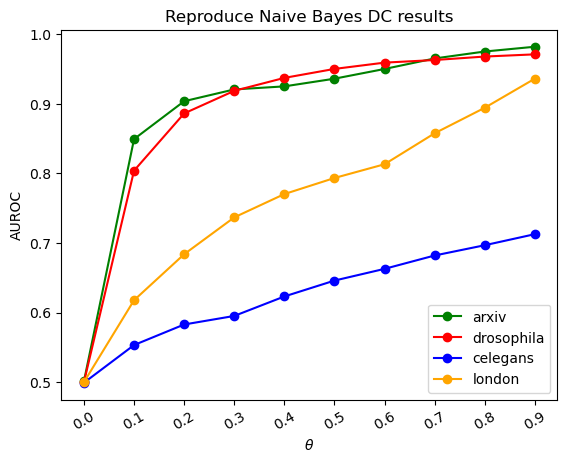

In [14]:
plt.figure()

plt.plot(arxiv_DC[2], label="arxiv", color="green", marker="o")
plt.plot(drosophila_DC[2], label="drosophila", color="red", marker="o")
plt.plot(celegans_DC[2], label="celegans", color="blue", marker="o")
plt.plot(london_DC[2], label="london", color="orange", marker="o")

plt.legend()

plt.xticks(
    range(10),
    [
        float(np.format_float_scientific(x, precision=1))
        for x in np.linspace(0, 0.9, 10)
    ],
    rotation=30
)

plt.xlabel("$\\theta$")
plt.ylabel("AUROC")

plt.title("Reproduce Naive Bayes DC results")

<Figure size 640x480 with 0 Axes>

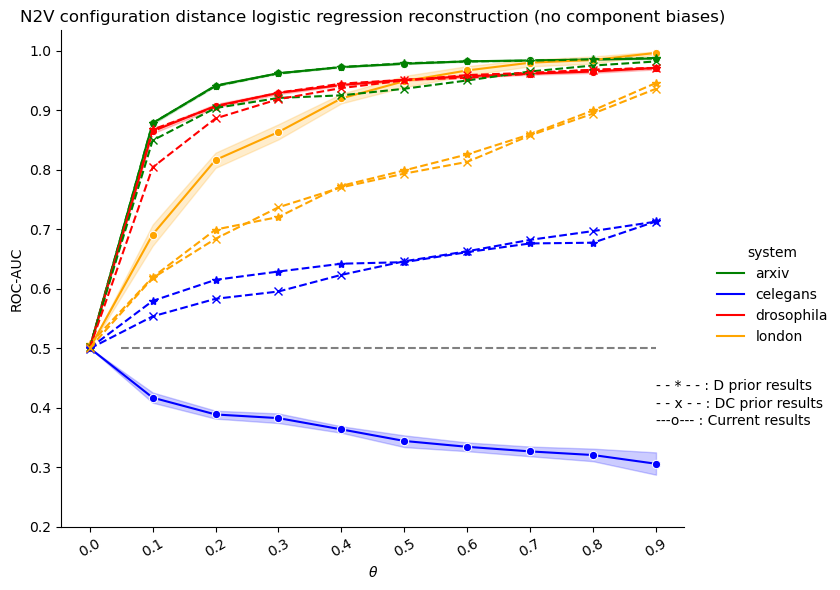

In [13]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
## ex27
sns.relplot(
    data=df, kind="line",
    x="theta", y="auroc",
    hue="system", palette=["green", "blue", "red", "orange"],
    marker="o",
    height=6, aspect=1.2,
    legend=True
)
## MEC
ticks_ = [float(np.format_float_scientific(x, precision=1)) for x in np.linspace(0, 0.9, 10)]
plt.plot(ticks_, arxiv_D[2], label="arxiv", color="green", marker="*", linestyle="--")
plt.plot(ticks_, drosophila_D[2], label="drosophila", color="red", marker="*", linestyle="--")
plt.plot(ticks_, celegans_D[2], label="celegans", color="blue", marker="*", linestyle="--")
plt.plot(ticks_, london_D[2], label="london", color="orange", marker="*", linestyle="--")
plt.plot(ticks_, arxiv_DC[2], label="arxiv", color="green", marker="x", linestyle="--")
plt.plot(ticks_, drosophila_DC[2], label="drosophila", color="red", marker="x", linestyle="--")
plt.plot(ticks_, celegans_DC[2], label="celegans", color="blue", marker="x", linestyle="--")
plt.plot(ticks_, london_DC[2], label="london", color="orange", marker="x", linestyle="--")

# Axes configuration
plt.hlines(0.5, 0.05, 0.9, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.2, 1, endpoint=True, num=8+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.text(0.9, 0.43, "- - * - - : D prior results")
plt.text(0.9, 0.4, "- - x - - : DC prior results")
plt.text(0.9, 0.37, "---o--- : Current results")
plt.title("N2V configuration distance logistic regression reconstruction (no component biases)")

# Save plot
plt.tight_layout()
plt.savefig("../../results/plots/line_auroc-pfi_N2V-logreg-configuration-distance_MEC-baseline.png", facecolor="white", transparent=False)